In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
import numpy as np

In [2]:
labels = ["Chronic Lymphocytic Leukemia","Follicular Lymphoma","Mantle Cell Lymphoma"]
img = load_img('dataset/MCL/sj-04-4525-R4_001.tif')
img1 = img_to_array(img)
img1 = np.expand_dims(img1, axis=0)
inputBatch = tf.image.extract_patches(img1, sizes=[1,224,224,1], strides=[1,224,224,1], rates=[1, 1, 1, 1], padding='VALID')
inputBatch = tf.reshape(inputBatch,[-1,224,224,3]).numpy()

In [3]:
model = tf.keras.models.load_model("cp-0030.h5", custom_objects={'leaky_relu': tf.nn.leaky_relu})
output = model.predict(inputBatch/255)

/home/cristianoc/.local/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


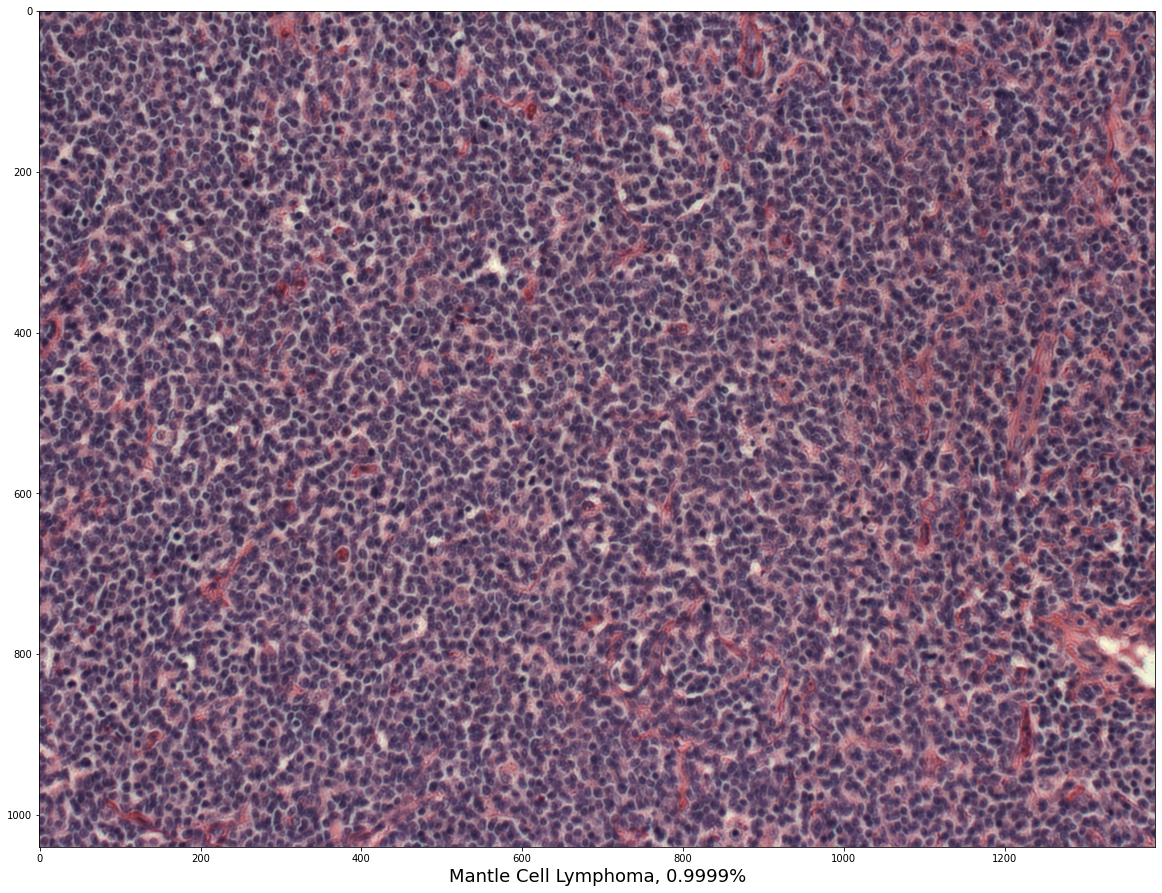

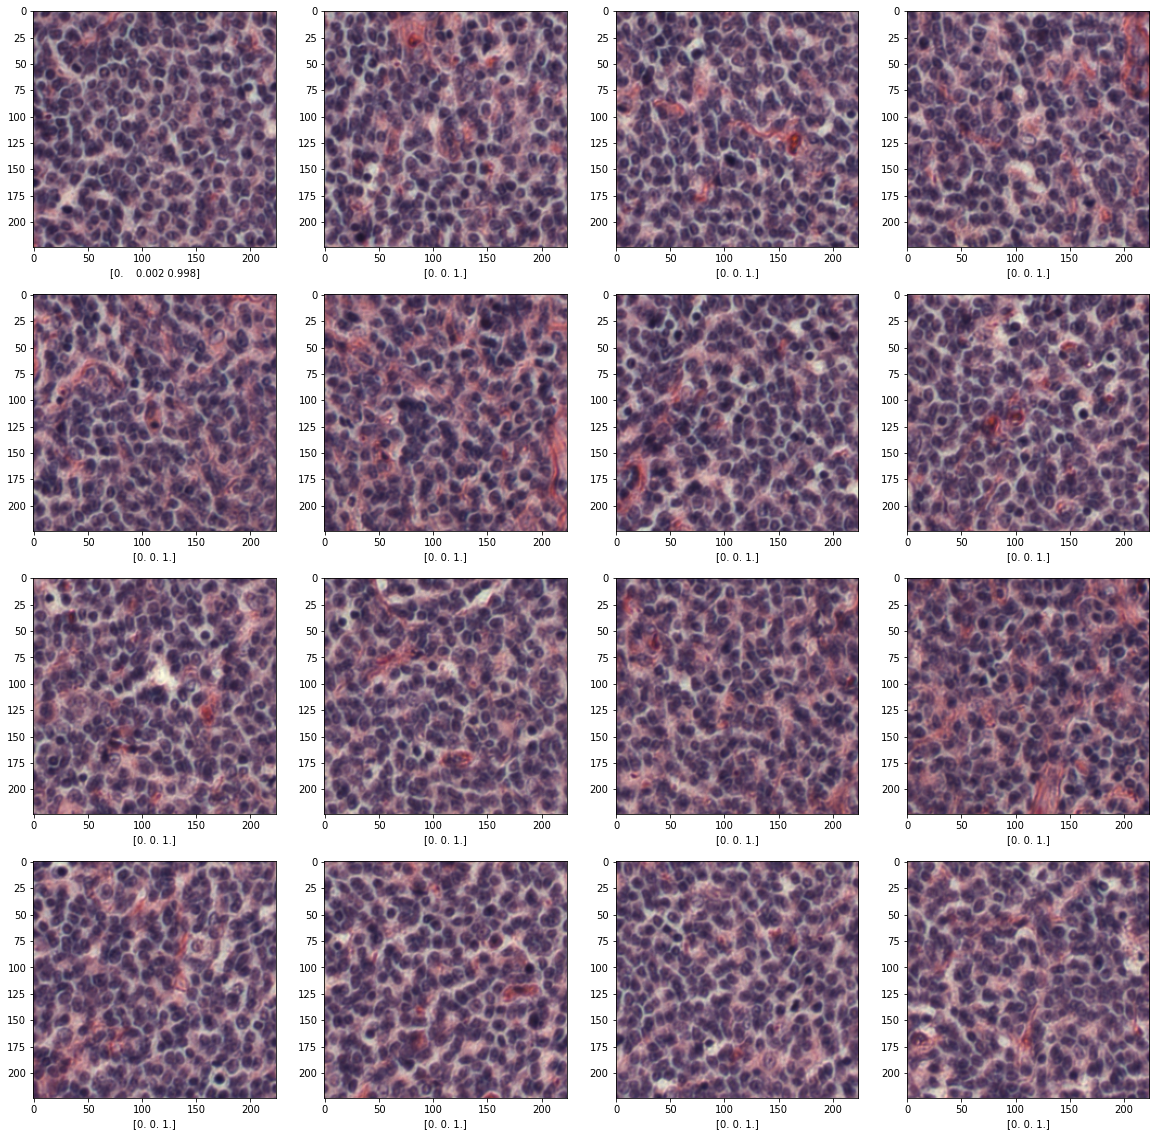

Mantle Cell Lymphoma
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
with np.printoptions(precision=3, suppress=True):
    prob = np.max(np.mean(output, axis=0))
    plt.figure(1, figsize=(20,20))
    plt.imshow(img)
    plt.xlabel("{}, {:0.4f}%".format(labels[np.argmax(sum(output))],prob), fontsize=18)
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
    for idx, image in enumerate(inputBatch):
        if idx == 16: break
        row = idx // 4
        col = idx % 4
        #axes[row, col].axis("off")
        axes[row, col].imshow(image/255, cmap="gray", aspect="auto")
        axes[row, col].set_xlabel(output[idx])
    plt.subplots_adjust(wspace=.2, hspace=.2)
    plt.show()

    print(labels[np.argmax(sum(output))])
    print((np.argmax(output, axis= 1)))

## We will extract the feature maps from this patch

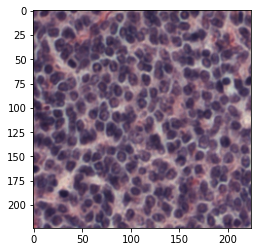

In [5]:
inputs = np.expand_dims(inputBatch[0], axis=0)
plt.imshow(inputBatch[0]/255)

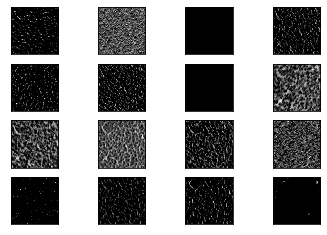

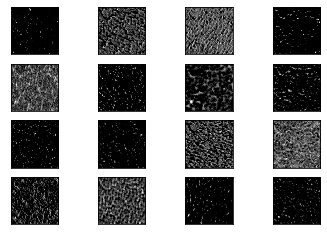

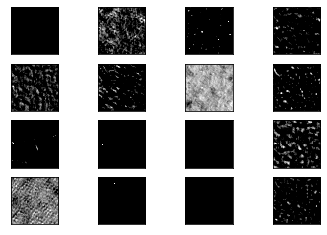

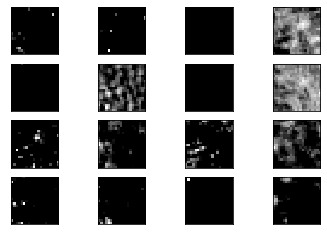

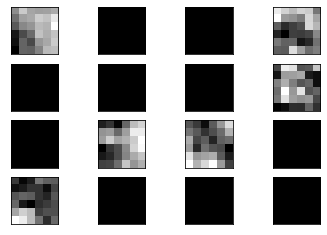

In [6]:
ixs = [1, 3, 5, 7, 9]
outputs = [model.layers[i].output for i in ixs]
model1 = Model(inputs=model.inputs, outputs=outputs)
# get feature map for first hidden layer
feature_maps = model1.predict(inputs)
# plot the output from each block
square = 4
for nr,fmap in enumerate(feature_maps):
    # plot all 16 maps in an 4x4 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(fmap[0, :, :, ix-1], cmap='gray', interpolation='nearest')
            plt.savefig("feature_map_{}".format(nr))
            ix += 1
    # show the figure
    plt.show()